<a href="https://colab.research.google.com/github/phmouras/Minicurso_Calculo_Numerico/blob/main/aula4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
N = 100

col = np.cos(np.arange(N+1)*math.pi / (N))     # Pontos de colocação


# Função base (Tchebyshev Polinomials):

T = np.zeros([N+2,N+1])

T[0,] = 1
T[1,] = col

for i in range(2,N+2):
  T[i,] = 2*col*T[i-1,] - T[i-2,]     # Expansão dos polinômios de Chebyshev para ordens maiore


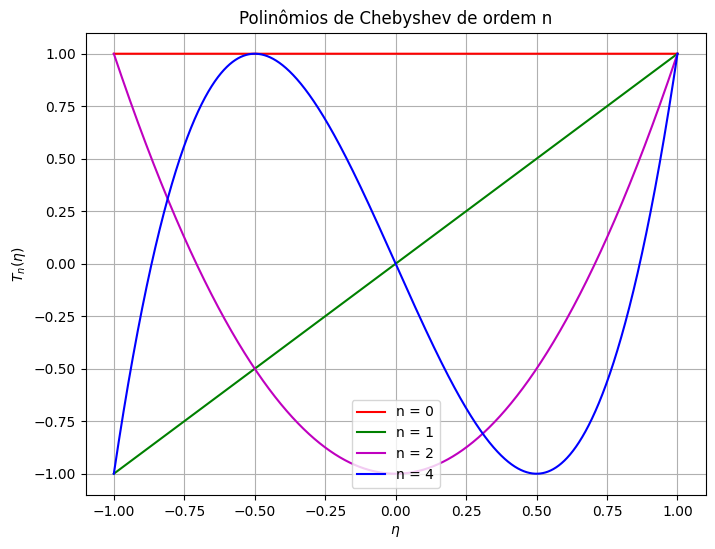

In [6]:

M = 3000

colplot = np.linspace(-1,1,M)

Tplot = np.zeros([N+2,M])

Tplot[0,] = 1
Tplot[1,] = colplot


for i in range(2,N+2):
  Tplot[i,] = 2*colplot*Tplot[i-1,] - Tplot[i-2,]

fig = plt.figure(figsize = (8, 6))

plt.plot(colplot, Tplot[0,:],'r', label = 'n = 0')
plt.plot(colplot, Tplot[1,:],'g', label = 'n = 1')
plt.plot(colplot, Tplot[2,:],'m', label = 'n = 2')
plt.plot(colplot, Tplot[3,:],'b', label = 'n = 4')
plt.xlabel('$\eta$')
plt.ylabel('$T_n(\eta)$')
plt.legend(loc = 'lower center')
plt.title('Polinômios de Chebyshev de ordem n')
plt.grid()



In [7]:
# Para um domínio qualquer:

L0 = 1

# Mapping

x = L0 * np.arctanh(col)

xcol = (1 - np.tanh(x/L0)**2)/L0  # dx/dcol

# Funções base (Tchebyshev Polinomials):

T = np.zeros([N+2,N+1])
xT = np.zeros([N+2,N+1])
colT = np.zeros([N+2,N+1])


T[0,] = 1           # Chebyshev de ordem n = 0
T[1,] = col         # Chebyshev de ordem n = 1

for i in range(2,N+2):
  T[i,] = 2*col*T[i-1,] - T[i-2,]   # equação de recorrência para a expansão dos polinômios de Chevyshev de ordem n = N

# Derivada da função base com relação a eta:

colT[0,] = 0
colT[1,] = 1

# Derivada da função base com relação a x:

xT[0,] = xcol*colT[0,]
xT[1,] = xcol*colT[1,]

for i in range(2, N+2):
  colT[i,] = 2*col*colT[i-1,] + 2*T[i-1,] - colT[i-2,]
  xT[i,] = xcol*colT[i,]


psi = T[0:N+1,:]      # função de base
xpsi = xT[0:N+1,:]      # derivada da função de base com relação a x


# Condições iniciais

u = (0.3)**(1/2)

f_0 = np.exp(-(x**2)/(u**2))       # solução exata em t = 0

# u = velocidade da onda

inv_psi = np.linalg.inv(psi)

a0 = np.dot(f_0, inv_psi)      # coeficientes modais a(0)

phi = np.dot(a0, psi)         # solução aproximada em t=0


<ipython-input-7-4eff2d1c33d7>:7: RuntimeWarning: divide by zero encountered in arctanh
  x = L0 * np.arctanh(col)


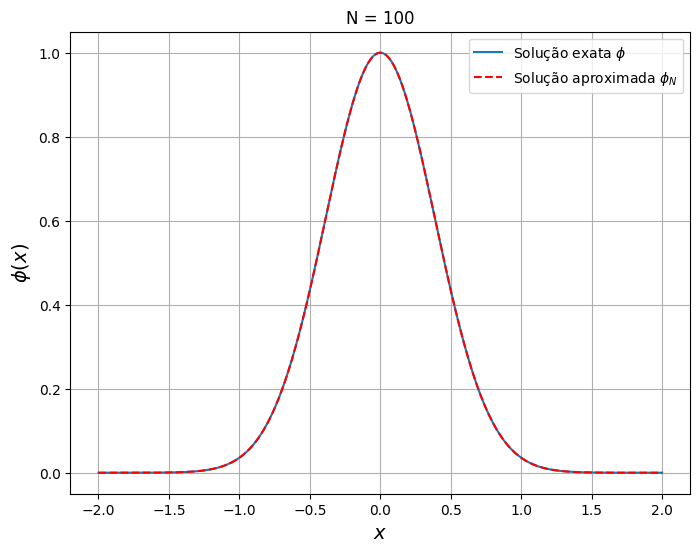

In [8]:

M = 3000

xplot = np.linspace(-2,2,M)

colplot = np.tanh(xplot/L0)

Tplot = np.zeros([N+2,M])

Tplot[0,] = 1
Tplot[1,] = colplot


for i in range(2,N+2):
  Tplot[i,] = 2*colplot*Tplot[i-1,] - Tplot[i-2,]

psiplot = Tplot[0:N+1,:]

f_plot0 = np.exp(-((xplot)**2)/(u)**2)

phiplot = np.dot(a0, psiplot)

erro = abs(phiplot - f_plot0)


fig = plt.figure(figsize = (8, 6))

plt.plot(xplot, f_plot0, label = 'Solução exata $\phi$')
plt.plot(xplot, phiplot,'--r', label = 'Solução aproximada $\phi_N$')
plt.xlabel('$x$', fontsize = 14)
plt.ylabel('$\phi(x)$', fontsize = 14)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.legend()
plt.title(f'N = {N}')
plt.grid()

Text(0, 0.5, 'x')

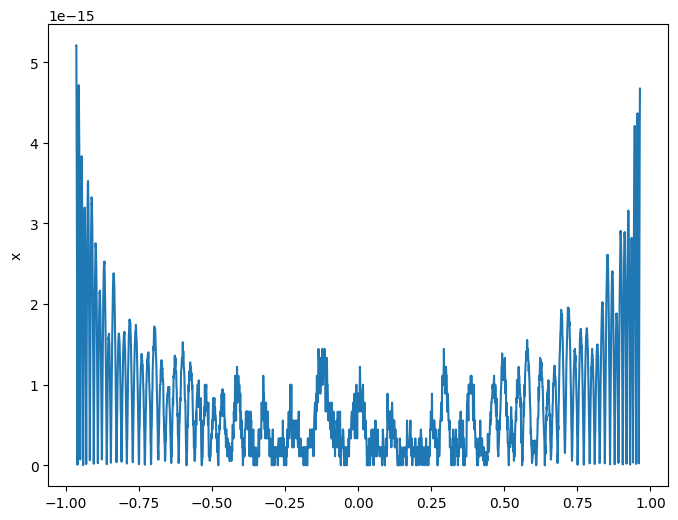

In [9]:
fig = plt.figure(figsize = (8, 6))

plt.plot(colplot, erro)

plt.ylabel('$|phi_N - \phi|')
plt.ylabel('x')

In [10]:
# Integração via quadratura de gauss

Nq = int(3/2*N)           # Truncagem de quadratura

gauss_quadrature = np.polynomial.legendre.leggauss(Nq)

new_col = gauss_quadrature[0]            # Pontos de quadratura


# Poliômios de Legendre

wq_col = gauss_quadrature[1]    # Legendre weight (Verificado)

qT = np.zeros([Nq+2,Nq])
qcolT = np.zeros([Nq+2,Nq])


qT[0,] = 1
qT[1,] = new_col

for i in range(2,Nq+2):
  qT[i,] = 2*new_col*qT[i-1,] - qT[i-2,]

# Derivada Função base nos pontos de quadratura:

qcolT[0,] = 0
qcolT[1,] = 1

for i in range(2,Nq+2):
  qcolT[i,] = 2*new_col*qcolT[i-1,] + 2*qT[i-1,] - qcolT[i-2,]

qpsi = qT[0:N+1,:]              # polinômios de Chebyshev de ordem N calculados nos pontos de quadratura

col_qpsi = qcolT[0:N+1,:]            # derivada da função qphi

qf_0 = np.exp(-(new_col**2)/(u**2))              # Solução exata t = 0 nos pontos de quadratura

qphi = np.dot(a0, qpsi)      # Função phi nos pontos de quadratura

qerror = abs(qphi-qf_0)


L2_error = ((1/2*np.dot(qerror**2,wq_col))**1/2)    # L2 error of HC in t=0




In [11]:
L2_error

0.002224191447618877

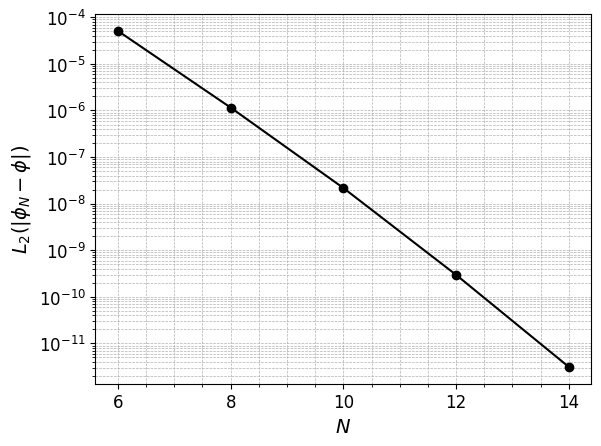

In [12]:

# Decaimento exponencial do erro L2 referente ao erro para N = 2,4,6,8,10



L2_error_6 = 5.101496260601563e-05
L2_error_8 = 1.1538176036182422e-06
L2_error_10 = 2.1701613682805872e-08
L2_error_12 = 2.964068637494716e-10
L2_error_14 = 3.130779546615595e-12

L2_error = [L2_error_6, L2_error_8,L2_error_10,L2_error_12,L2_error_14]

N_list = [6,8,10,12,14]

N_max = 14

plt.plot(N_list, L2_error,color='black' , marker ='o')
plt.xticks(N_list)
plt.tick_params(axis='both', which='both', labelsize=12)  # Ajusta o tamanho dos ticks em ambos os eixos
plt.xlabel('$N$', fontsize = 14)
plt.ylabel('$L_2(|\phi_N - \phi|)$', fontsize = 14)
plt.yscale('log')
plt.grid(which='both', linestyle='--', linewidth=0.5)  # Grades principais
plt.minorticks_on()  # Ativa grades menores
plt.show()

In [13]:

# Temporal integration - Runge-Kutta 4th order

h = 0.01     # t[i+1] - t[i]
tf = 10

It = int(tf/h)

t1 = np.linspace(0, tf, It)

phi_set = np.zeros([It,M])

#phi0_set = np.zeros([0,It])

phi_set = []

t = 0

while t < tf:

  xphi = np.dot(a0, xpsi)
  da = np.dot(- xphi, inv_psi)
  K1 = h*(da)

  xphi = np.dot(a0 + K1/2, xpsi)
  da = np.dot(- xphi, inv_psi)
  K2 = h*(da)

  xphi = np.dot(a0 + K2/2, xpsi)
  da = np.dot(- xphi, inv_psi)
  K3 = h*(da)

  xphi = np.dot(a0 + K3, xpsi)
  da = np.dot(- xphi, inv_psi)
  K4 = h*(da)

  a0 = a0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)
  phi_set.append(np.dot(a0, psiplot))

#  print(f't = {t}')

  t = t + h


In [17]:
It

1000

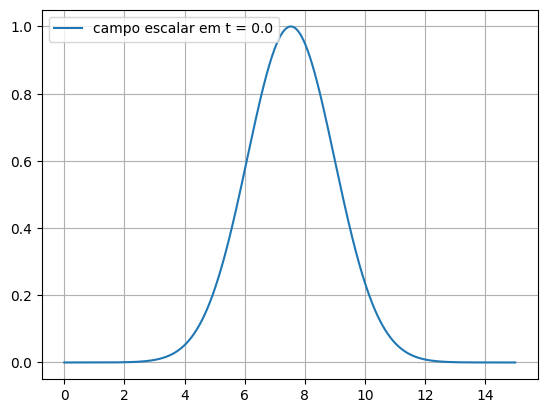

In [30]:

rplot = np.linspace(0, 15, M)

i = 0
t2 = h*i
plt.plot(rplot,phi_set[i], label = f'campo escalar em t = {t2}')
plt.grid()
plt.legend()

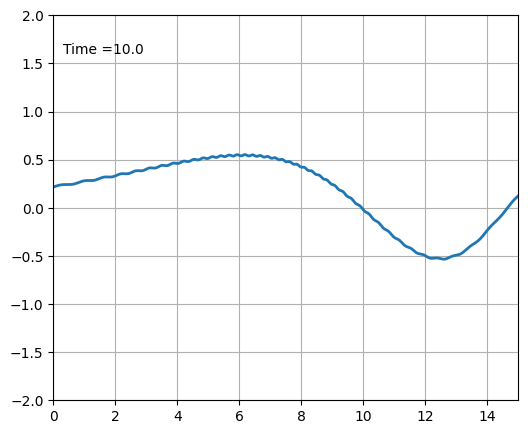

In [19]:

# Animation plot

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure(figsize = (6,5))
ax = plt.axes(xlim=(0, 15), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)
time_text = ax.text(0.02, 0.9, '', transform=ax.transAxes)
plt.grid()

x = rplot

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line,

def animate(i):
  y = phi_set[i]
  line.set_data(x, y)
  time_text.set_text("Time ="+str(round(h+h*i,2)))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=10, blit=True)

HTML(anim.to_html5_video())